If you'd like to smooth out your jagged jagged lines in pandas, you'll want compute a **rolling average**. So instead of the original values, you'll have the average of 5 days (or hours, or years, or weeks, or months, or whatever).

# Using `.rolling` in pandas to compute a rolling mean or median

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv("pr-deaths.csv")
df.head()

,SEP,Y2015,Y2016,Y2017
0,1,75,75,92
1,2,77,67,69
2,3,67,78,78
3,4,71,99,84
4,5,62,89,75


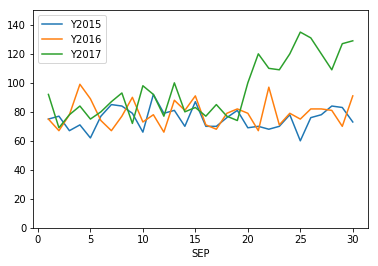

In [7]:
df.plot(x='SEP', ylim=(0, 150))

You can use `df.rolling`, and then ask it for the `.mean()`. The code we're going to use is

```python
df.rolling(3, on='SEP').mean()
```

Let's break it down:

    * `5` means, we want to combine 5 values
    * `on=` means **pay attention to the order of the `SEP` column**
    * `.mean()` means we want to take the mean of those 5 values (you could also use `.median()` or `.max()` or anything else)

So it will take every 5 values and take their mean. You'll see `NaN` for the first 4 days because we're requiring 5 values before we take the mean.

Now let's see it in action:

In [29]:
df.rolling(5, on='SEP').mean()

,SEP,Y2015,Y2016,Y2017
0,1,NaN,NaN,NaN
1,2,NaN,NaN,NaN
2,3,NaN,NaN,NaN
3,4,NaN,NaN,NaN
4,5,70.4,81.6,79.6
5,6,70.8,81.4,77.2
6,7,72.4,81.4,80.8
7,8,75.8,81.2,83.8
8,9,77.4,79.4,81.4
9,10,78.2,76.2,86.0


Great! Maybe it's reasonable? Let's see how it looks graphed.

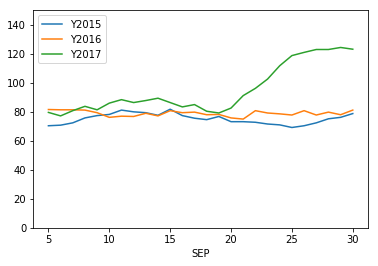

In [30]:
df.rolling(5, on='SEP').mean().plot(x='SEP', ylim=(0, 150))

## Using `plt.subplots` to plot two graphs next to each other

Remember how we sometimes do `fig, ax = plt.subplots()` to create an empty graph? We can also use it (with some more options) to create _two_ empty graphs. They end up in the same image, and it allows us to plot them on top of or next to each other.

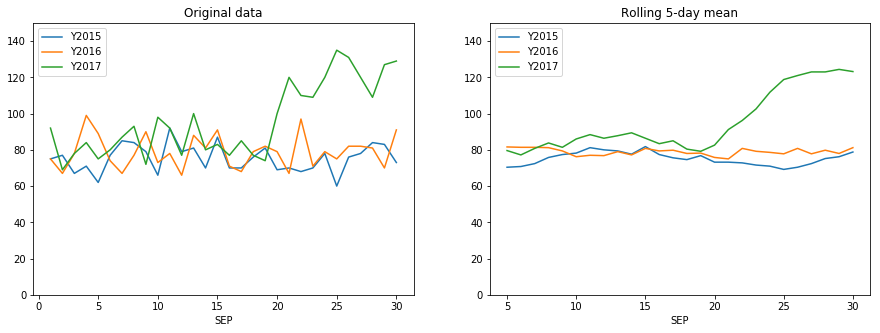

In [40]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ax1.set_title("Original data")
df.plot(x='SEP', ylim=(0, 150), ax=ax1)

ax2.set_title("Rolling 5-day mean")
df.rolling(5, on='SEP').mean().plot(x='SEP', ylim=(0, 150), ax=ax2)